In [225]:
%matplotlib inline

Example including a noise power spectrum with the model.

This follows the approaches presented in [Miville-Deschênes+2002](https://ui.adsabs.harvard.edu/abs/2002A%26A...393..749M/abstract), [Miville-Deschênes+2016](https://ui.adsabs.harvard.edu/abs/2016A%26A...593A...4M/abstract).

$$ P(k) = B(k) \left[ Ak^\gamma + C k^\beta \right] $$

where $B(k)$ is the instrumental response (i.e., beam), the first power-law is the signal component, and the second is the noise component for a structured noise background.


In [226]:
import matplotlib.pyplot as plt
import numpy as np


from turbustat.simulator import make_extended

from turbustat.statistics import PowerSpectrum


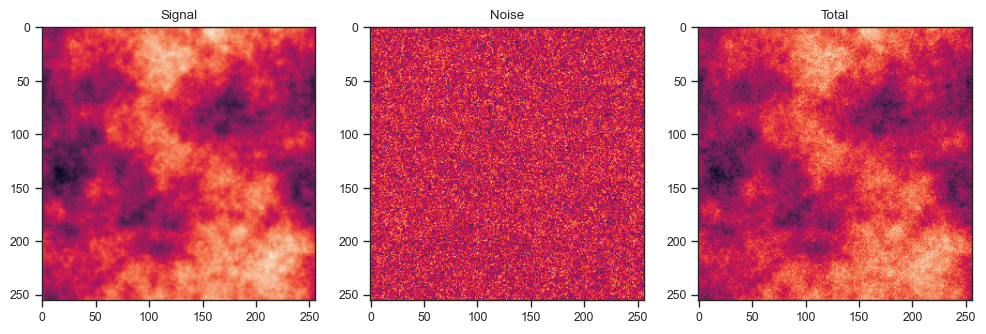

In [227]:
signal_image = 1 * make_extended(256, powerlaw=3., randomseed=32768324)

# You NEED to a different seed! Otherwise you get excess power b/c the "random" phases add coherently
noise_background = 10 * make_extended(256, powerlaw=0.5, randomseed=453789)

# Add in the Fourier domain!
combined_image = signal_image + noise_background

plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.title("Signal")
plt.imshow(signal_image)
# plt.colorbar()

plt.subplot(132)
plt.title("Noise")
plt.imshow(noise_background)
# plt.colorbar()

plt.subplot(133)
plt.title("Total")
plt.imshow(combined_image)
# plt.colorbar()

In [228]:
# Mock FITS HDU

combined_hdu = fits.PrimaryHDU(combined_image)

noise_hdu = fits.PrimaryHDU(noise_background)

signal_hdu = fits.PrimaryHDU(signal_image)

/Users/ekoch/Library/CloudStorage/Dropbox/code_development/TurbuStat/turbustat/statistics/base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")
/Users/ekoch/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/ekoch/Library/CloudStorage/Dropbox/code_development/TurbuStat/turbustat/statistics/base_pspec2.py:483: UserWarning: The elliptical parameter is close to 1. The field may be isotropic and the fit is not converging to 1. Consider fitting with `fix_ellip_params=True`, which forces the ellipticity to 1.
  warnings.warn("The elliptical parameter is close to 1. The field "
/Users/ekoch/Library/CloudStorage/Dropbox/code_development/TurbuStat/turbustat/statistics/elliptical_powerlaw.py:253: RuntimeWarning: divide by zero encountered in log10
  np.log10(x**2 * term1 + x * y * term2 + y**2 * term3)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.239e+05
Date:                Mon, 25 Mar 2024   Prob (F-statistic):          1.61e-293
Time:                        13:42:38   Log-Likelihood:                 610.31
No. Observations:                 181   AIC:                            -1217.
Df Residuals:                     179   BIC:                            -1210.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2931      0.003    734.710      0.0

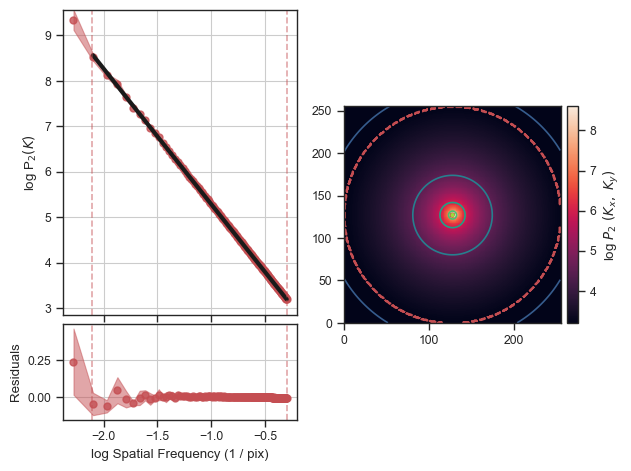

In [229]:
signal_pspec = PowerSpectrum(signal_hdu)
signal_pspec.run(verbose=True)

# We're going to exclude the largest 2 bins that are poorly sampled at the scale of the whole image
signal_ps1D = signal_pspec.ps1D[2:]


/Users/ekoch/Library/CloudStorage/Dropbox/code_development/TurbuStat/turbustat/statistics/base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")
/Users/ekoch/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/ekoch/Library/CloudStorage/Dropbox/code_development/TurbuStat/turbustat/statistics/base_pspec2.py:483: UserWarning: The elliptical parameter is close to 1. The field may be isotropic and the fit is not converging to 1. Consider fitting with `fix_ellip_params=True`, which forces the ellipticity to 1.
  warnings.warn("The elliptical parameter is close to 1. The field "
/Users/ekoch/Library/CloudStorage/Dropbox/code_development/TurbuStat/turbustat/statistics/elliptical_powerlaw.py:253: RuntimeWarning: divide by zero encountered in log10
  np.log10(x**2 * term1 + x * y * term2 + y**2 * term3)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     674.0
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           1.37e-62
Time:                        13:42:42   Log-Likelihood:                 49.287
No. Observations:                 181   AIC:                            -94.57
Df Residuals:                     179   BIC:                            -88.18
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7078      0.047     78.543      0.0

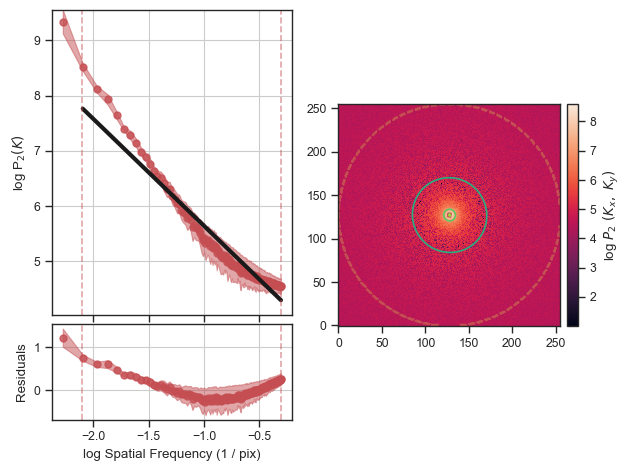

In [230]:
comb_pspec = PowerSpectrum(combined_hdu)
comb_pspec.run(verbose=True)

/Users/ekoch/Library/CloudStorage/Dropbox/code_development/TurbuStat/turbustat/statistics/base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")
/Users/ekoch/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/ekoch/Library/CloudStorage/Dropbox/code_development/TurbuStat/turbustat/statistics/base_pspec2.py:483: UserWarning: The elliptical parameter is close to 1. The field may be isotropic and the fit is not converging to 1. Consider fitting with `fix_ellip_params=True`, which forces the ellipticity to 1.
  warnings.warn("The elliptical parameter is close to 1. The field "
/Users/ekoch/Library/CloudStorage/Dropbox/code_development/TurbuStat/turbustat/statistics/elliptical_powerlaw.py:253: RuntimeWarning: divide by zero encountered in log10
  np.log10(x**2 * term1 + x * y * term2 + y**2 * term3)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.260e+05
Date:                Mon, 25 Mar 2024   Prob (F-statistic):          8.95e-294
Time:                        13:42:44   Log-Likelihood:                 934.37
No. Observations:                 181   AIC:                            -1865.
Df Residuals:                     179   BIC:                            -1858.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3735      0.001   8420.560      0.0

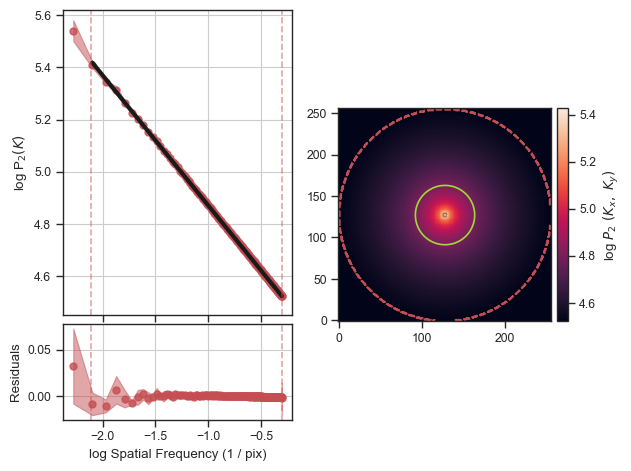

In [231]:
noise_pspec = PowerSpectrum(noise_hdu)
noise_pspec.run(verbose=True)

In [232]:
# We're going to exlude the largest ~2 bins

combined_ps1D = comb_pspec.ps1D[2:]
noise_ps1D = noise_pspec.ps1D[2:]

freqs = comb_pspec.freqs.value[2:]

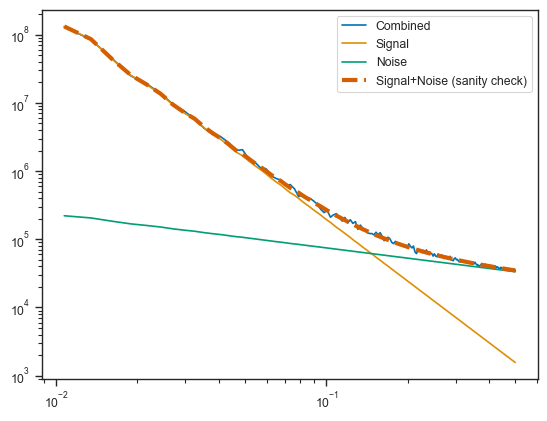

In [246]:
# Compare the 3 different power spectra:

plt.loglog(freqs, combined_ps1D, label='Combined')

plt.loglog(freqs, signal_ps1D, label='Signal')

plt.loglog(freqs, noise_ps1D, label='Noise')

plt.loglog(freqs, signal_ps1D + noise_ps1D, linestyle='--', linewidth=3, label='Signal+Noise (sanity check)')

plt.legend()

### Build the combined power spectrum model

$$ {\rm log} P(k) = {\rm log} \left( Ak^\gamma + N(k) \right) $$

assuming the beam is negligible here (since we haven't smoothed the data).

We'll use pymc3 as an example to build and fit the model.

In [234]:
import pymc3 as pm

import arviz as az

In [235]:
with pm.Model() as model:
    
    # Sample the amplitudes in log space. They must be positive definite
    logA = pm.Normal("logA",  mu=np.log10(np.nanmax(combined_ps1D) - np.nanmax(noise_ps1D)), sigma=2)
    
    # Relatively uninformative priors on the indices
    gamma = pm.Normal('gamma', mu=0., sigma=5.)
    
    sigma = pm.HalfCauchy("sigma", beta=2)
    
    likelihood = pm.Normal("P", mu=np.log10(10**logA * freqs**gamma + noise_ps1D), sigma=sigma,
                          observed=np.log10(combined_ps1D))

In [236]:
with model:
    idata = pm.sample(3000)

/var/folders/zq/1v3_7dn10sl0f6m5xqw37fvw0000gn/T/ipykernel_51264/2318304347.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  idata = pm.sample(3000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, gamma, logA]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 25 seconds.
The acceptance probability does not match the target. It is 0.8809717451251584, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8889498796670104, but should be close to 0.8. Try to increase the number of tuning steps.


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/ekoch/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


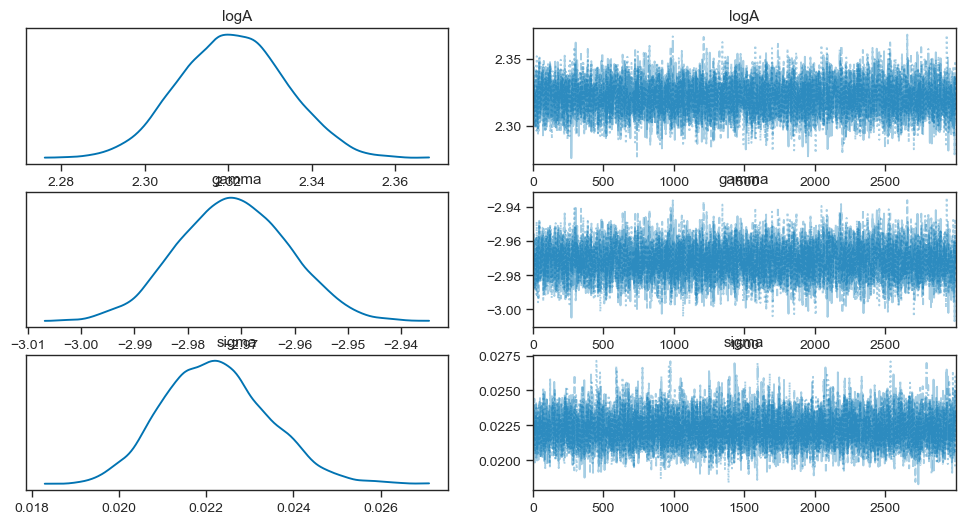

In [237]:
_ = az.plot_trace(idata, combined=True)

In [238]:
# NOTE: I suspect this breaks in pymc4. Need to update there

logA_median = np.median(idata.get_values('logA'))
gamma_median = np.median(idata.get_values('gamma'))

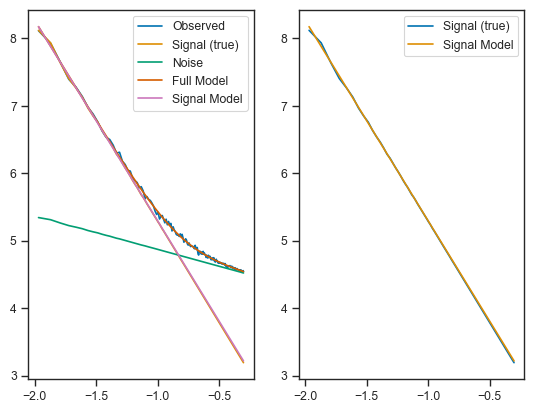

In [239]:
plt.subplot(121)

plt.plot(np.log10(freqs), np.log10(combined_ps1D), label='Observed')

plt.plot(np.log10(freqs), np.log10(signal_ps1D), label='Signal (true)')

plt.plot(np.log10(freqs), np.log10(noise_ps1D), label='Noise')

plt.plot(np.log10(freqs), np.log10(10**logA_median * freqs**gamma_median + noise_ps1D), label='Full Model')
plt.plot(np.log10(freqs), np.log10(10**logA_median * freqs**gamma_median), label='Signal Model')

plt.legend()

plt.subplot(122)

plt.plot(np.log10(freqs), np.log10(signal_ps1D), label='Signal (true)')
plt.plot(np.log10(freqs), np.log10(10**logA_median * freqs**gamma_median), label='Signal Model')

plt.legend()


The output is still biased.

Expand the model to explicitly model the noise component as a powerlaw, itself:


$$ {\rm log} P(k) = {\rm log} \left( Ak^\gamma + C k^\gamma \right) $$

In [240]:
with pm.Model() as model_w_noiseplaw:

    # Signal power law
    logA = pm.Normal("logA",  mu=np.log10(np.nanmax(combined_ps1D) - np.nanmax(noise_ps1D)), sigma=2)
    gamma = pm.Normal('gamma', mu=0., sigma=5.)

    # Noise power law
    logC = pm.Normal("logC",  mu=np.log10(np.nanmax(noise_ps1D)), sigma=2)
    beta = pm.Normal('beta', mu=0., sigma=5.)
    
    
    sigma = pm.HalfCauchy("sigma", beta=2)
    sigma_noise = pm.HalfCauchy("sigma_noise", beta=2)
    
    likelihood_noise = pm.Normal("Pn", mu=np.log10(10**logC * freqs**beta),
                                 sigma=sigma_noise,
                                 observed=np.log10(noise_ps1D))
    
    likelihood = pm.Normal("P", mu=np.log10(10**logA * freqs**gamma + 10**logC * freqs**beta),
                           sigma=sigma,
                           observed=np.log10(combined_ps1D))
    
    

In [241]:
with model_w_noiseplaw:
    idata = pm.sample(3000)

/var/folders/zq/1v3_7dn10sl0f6m5xqw37fvw0000gn/T/ipykernel_51264/293407149.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  idata = pm.sample(3000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_noise, sigma, beta, logC, gamma, logA]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 54 seconds.
The acceptance probability does not match the target. It is 0.8944502798329131, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8851646860075209, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9928898425686751, but should be close to 0.8. Try to increase the number of tuning steps.


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/ekoch/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


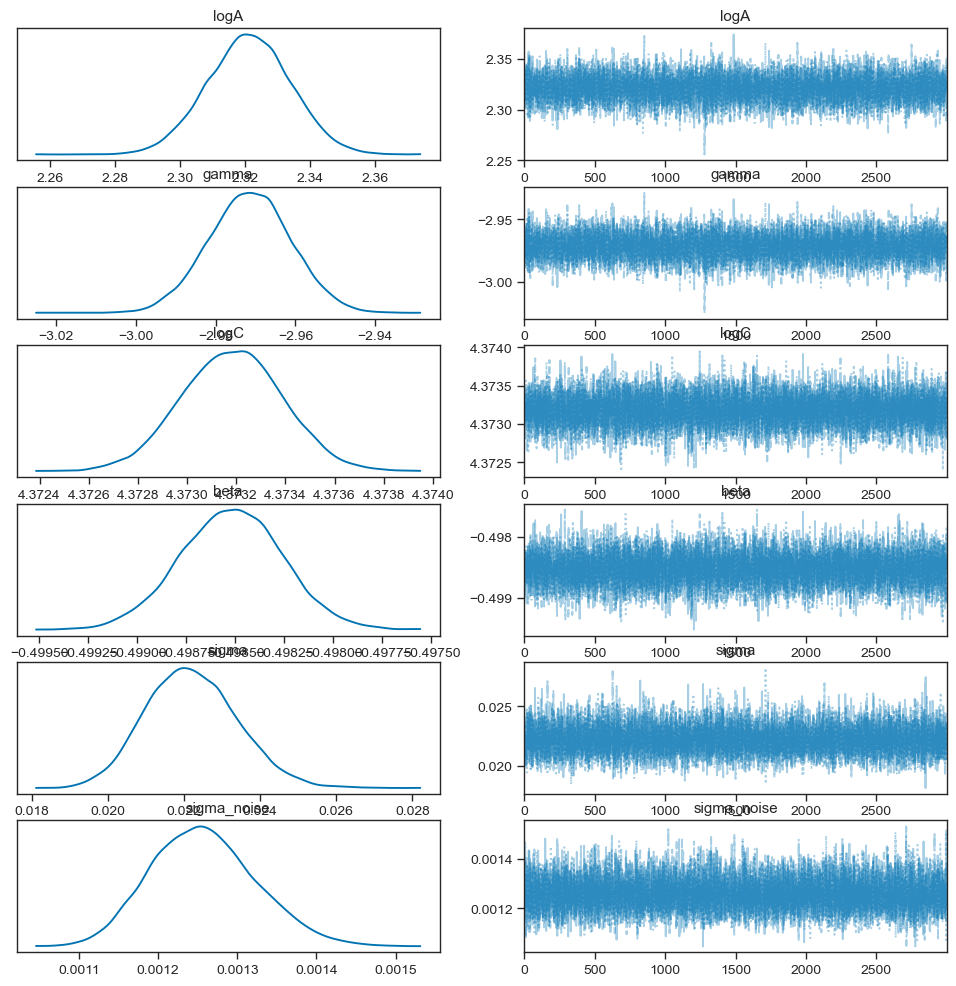

In [242]:
_ = az.plot_trace(idata, combined=True)

In [243]:
# NOTE: I suspect this breaks in pymc4. Need to update there


logA_median = np.median(idata.get_values('logA'))
gamma_median = np.median(idata.get_values('gamma'))

logC_median = np.median(idata.get_values('logC'))
beta_median = np.median(idata.get_values('beta'))



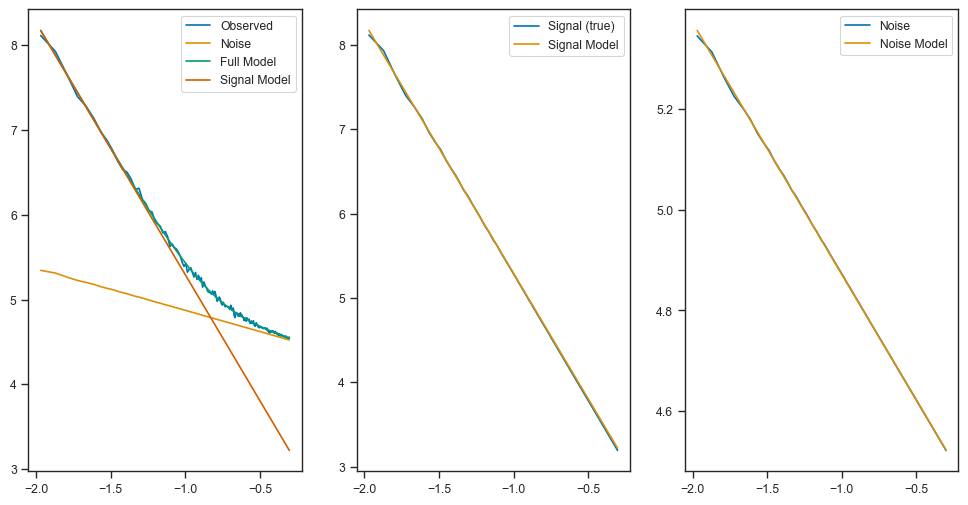

In [244]:
plt.figure(figsize=(12, 6))

plt.subplot(131)

plt.plot(np.log10(freqs), np.log10(combined_ps1D), label='Observed')

plt.plot(np.log10(freqs), np.log10(noise_ps1D), label='Noise')

plt.plot(np.log10(freqs), np.log10(10**logA_median * freqs**gamma_median +
                                   10**logC_median * freqs**beta_median), label='Full Model')
plt.plot(np.log10(freqs), np.log10(10**logA_median * freqs**gamma_median), label='Signal Model')

plt.legend()

plt.subplot(132)

plt.plot(np.log10(freqs), np.log10(signal_ps1D), label='Signal (true)')
plt.plot(np.log10(freqs), np.log10(10**logA_median * freqs**gamma_median), label='Signal Model')

plt.legend()

plt.subplot(133)

plt.plot(np.log10(freqs), np.log10(noise_ps1D), label='Noise')

plt.plot(np.log10(freqs), np.log10(10**logC_median * freqs**beta_median), label='Noise Model')

plt.legend()

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/ekoch/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


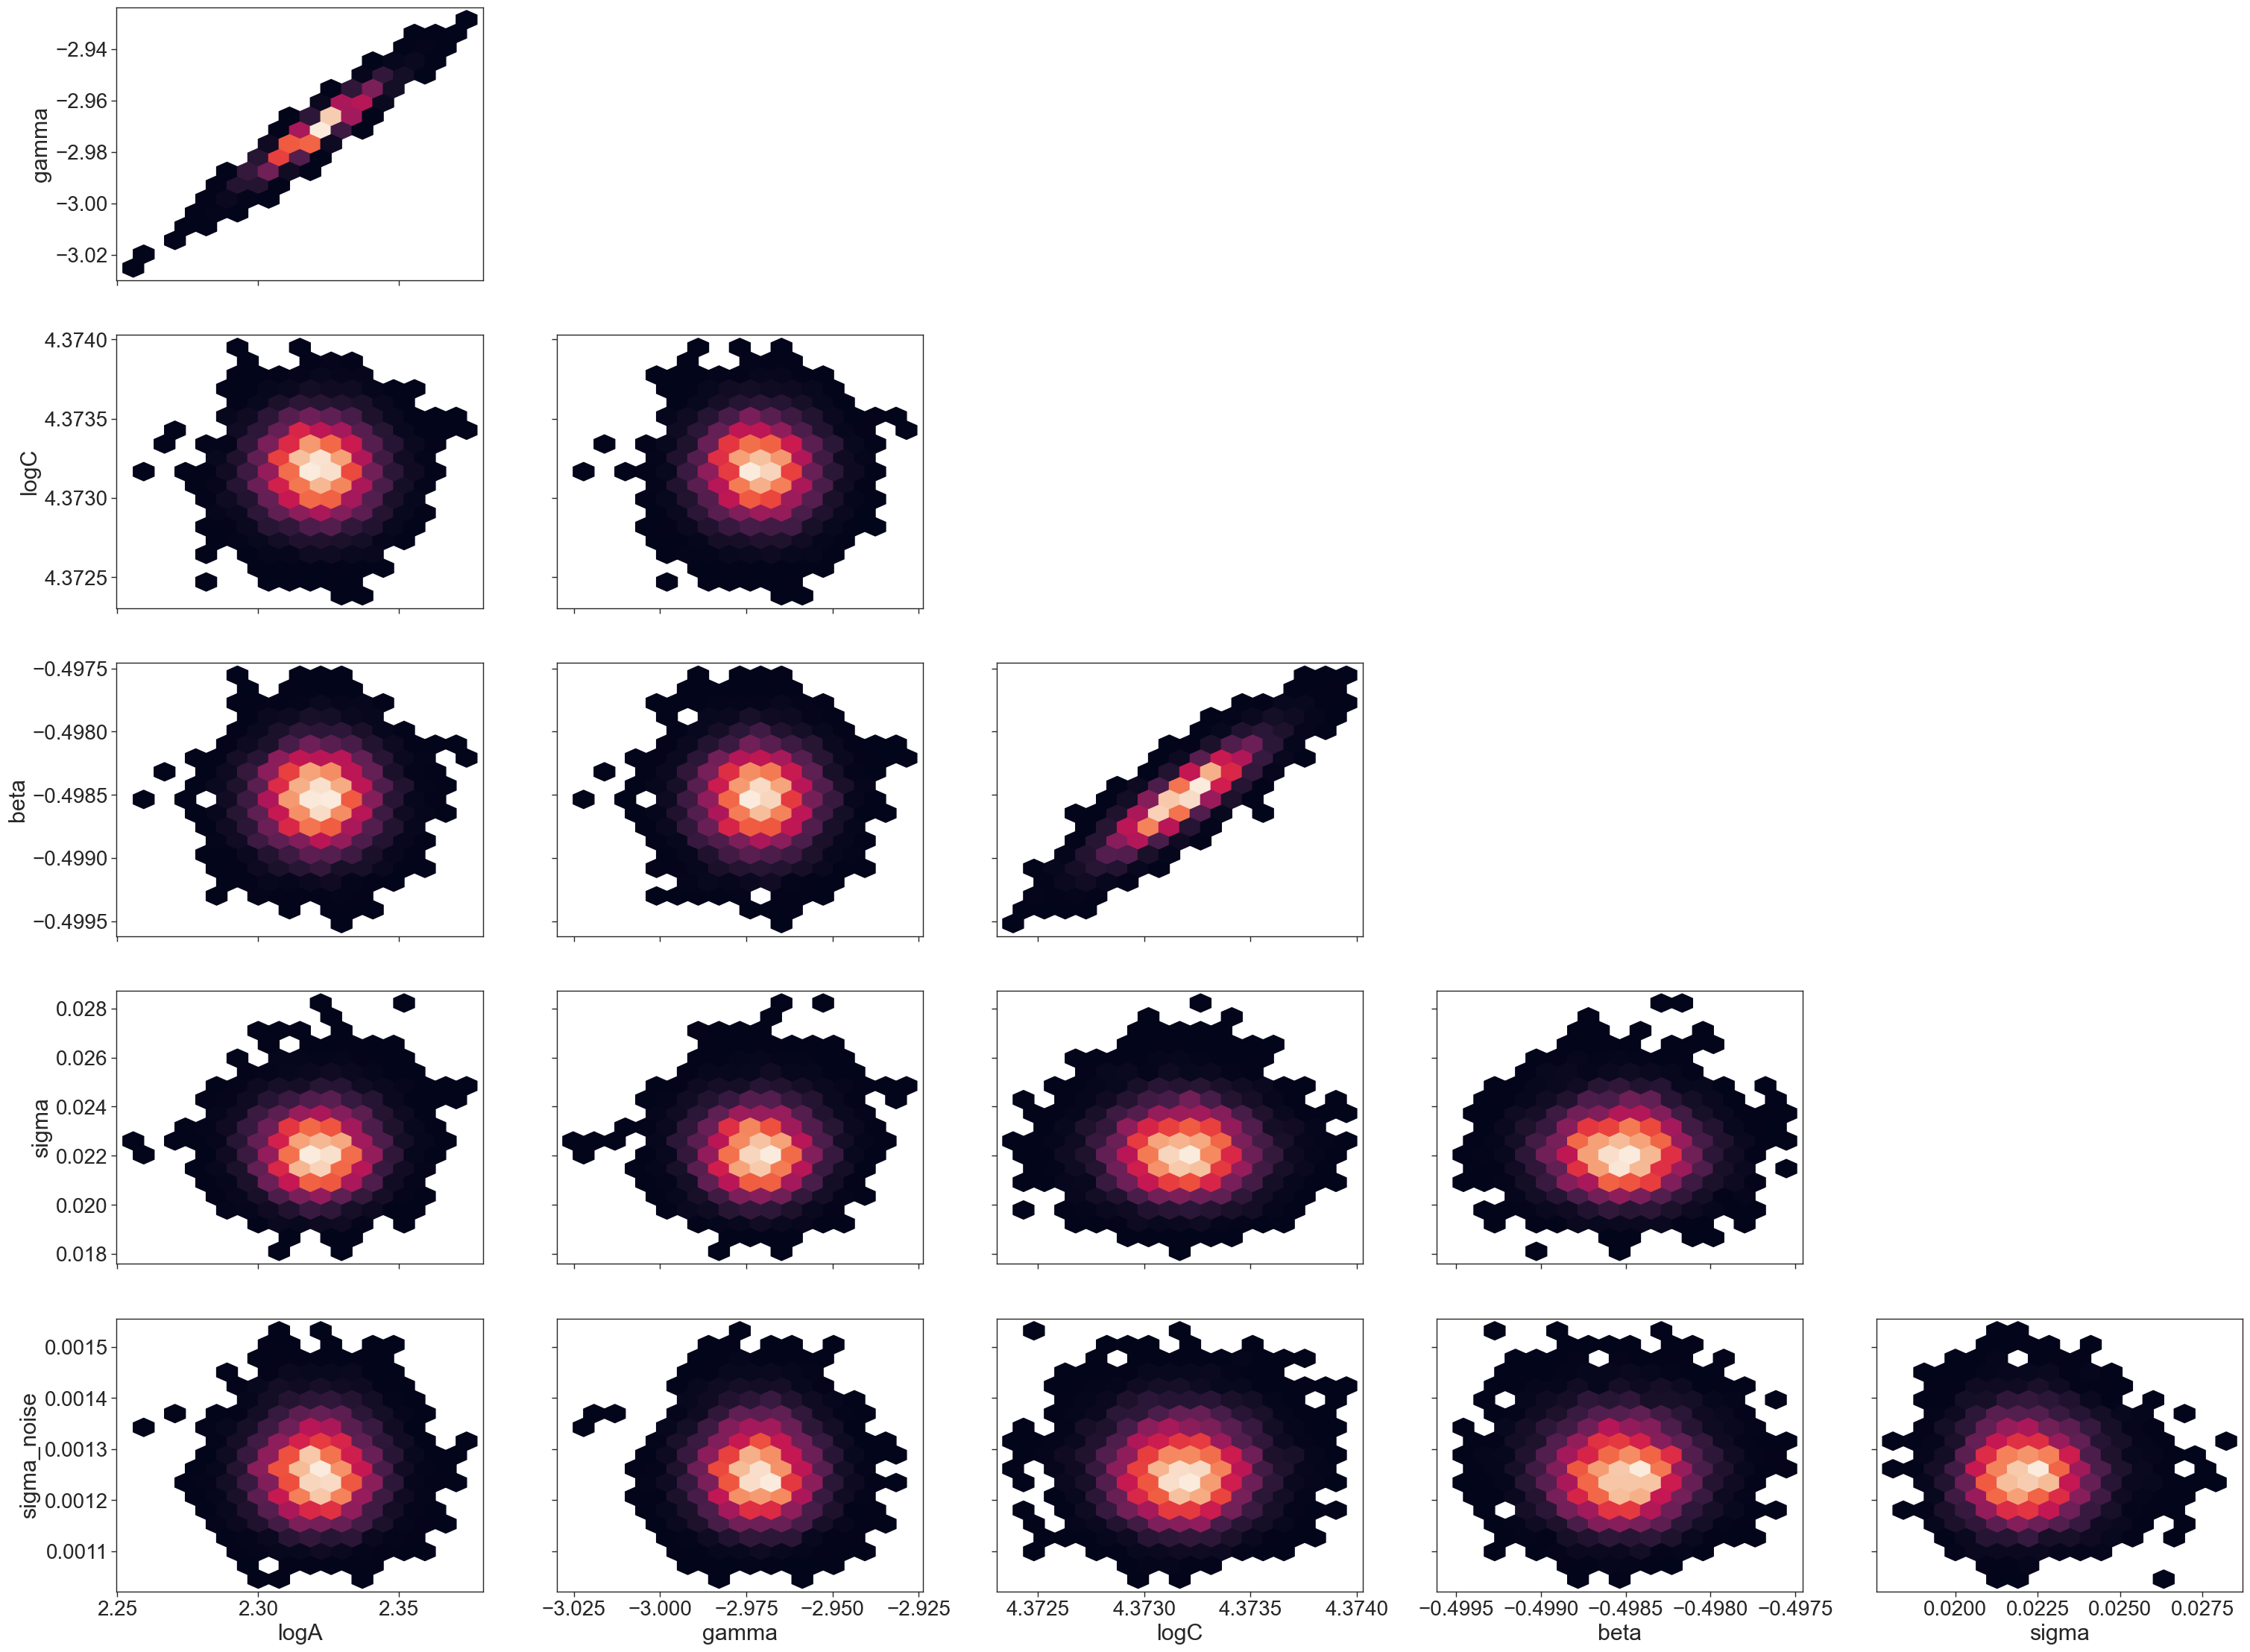

In [245]:
_ = az.plot_pair(idata, textsize=20, kind='hexbin')

Both models are able to correctly separate the terms. This is at least a good sanity check (given the perfect resolution and lack of other sources of noise!).

